In [3]:
import pandas as pd
import matplotlib.pyplot as plt

    Assay  Accuracy  Balanced Accuracy    Recall  Precision       AUC
0       1  0.245902           0.433373  0.179245   0.791667  0.428361
1       2  0.568627           0.577778  0.600000   0.360000  0.574074
2       3  0.526786           0.514706  0.500000   0.094340  0.544118
3       4  0.500000           0.518972  0.565217   0.309524  0.524111
4       5  0.466667           0.479167  0.416667   0.576923  0.482639
..    ...       ...                ...       ...        ...       ...
204   205  0.436066           0.468651  0.387850   0.669355  0.432911
205   206  0.611940           0.444853  0.125000   0.142857  0.339461
206   207  0.583333           0.537500  0.125000   0.666667  0.528125
207   208  0.512821           0.508065  0.516129   0.800000  0.477823
208   209  0.694337           0.489327  0.201794   0.131579  0.476256

[209 rows x 6 columns]


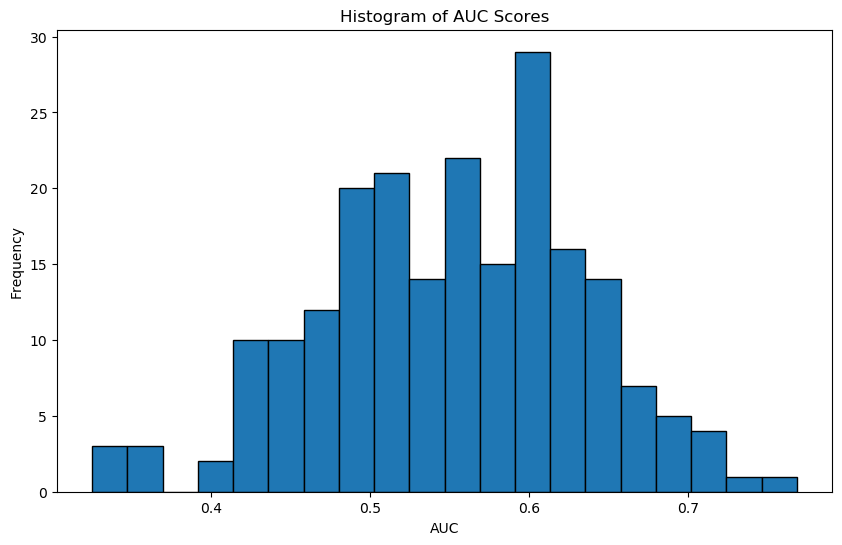

In [4]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score

# Load the dataset
file_path = '../The_Hofmarcher_Files/CP_count_Hofmarcher.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# List of assay columns to process (assuming all columns except INCHIKEY and the last 13 columns are assays)
assay_columns = data.columns[1:-13]

# Initialize a list to store results
results = []

# Define a function to calculate a probability score based on the distance from the threshold
def calculate_probability_score(value, threshold=-3):
    return 1 / (1 + np.exp(value - threshold))

# Process each assay
for assay in assay_columns:
    # Drop rows with NaNs or -1s in the current assay column or in Cells_Number_Object_Number
    valid_data = data[(data[assay] != -1) & (data[assay].notna())].copy()
    
    # Calculate the probability score
    valid_data.loc[:, 'Probability_Score'] = valid_data['Cells_Number_Object_Number'].apply(calculate_probability_score)
    
    # True values for the assay
    true_values = valid_data[assay] == 1
    
    # Calculate metrics
    accuracy = accuracy_score(true_values, valid_data['Probability_Score'] >= 0.5)
    balanced_accuracy = balanced_accuracy_score(true_values, valid_data['Probability_Score'] >= 0.5)
    recall = recall_score(true_values, valid_data['Probability_Score'] >= 0.5)
    precision = precision_score(true_values, valid_data['Probability_Score'] >= 0.5)
    auc = roc_auc_score(true_values, valid_data['Probability_Score'])
    
    # Append the result
    results.append({
        'Assay': assay,
        'Accuracy': accuracy,
        'Balanced Accuracy': balanced_accuracy,
        'Recall': recall,
        'Precision': precision,
        'AUC': auc
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results DataFrame
print(results_df)

# Plot the histogram of AUC scores
plt.figure(figsize=(10, 6))
results_df['AUC'].hist(bins=20, edgecolor='black')
plt.title('Histogram of AUC Scores')
plt.xlabel('AUC')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()


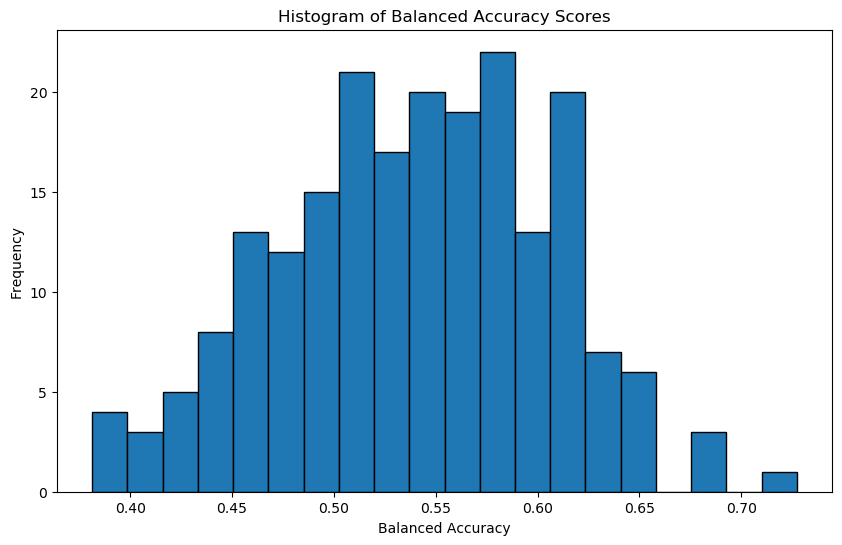

In [5]:
# Plot the histogram of AUC scores
plt.figure(figsize=(10, 6))
results_df['Balanced Accuracy'].hist(bins=20, edgecolor='black')
plt.title('Histogram of Balanced Accuracy Scores')
plt.xlabel('Balanced Accuracy')
plt.ylabel('Frequency')
plt.grid(False)
plt.show()

In [6]:
results_df.AUC.mean()

0.5512881678714444

In [7]:
results_df.AUC.std()

0.08226359951942906

In [8]:
results_df

,Assay,Accuracy,Balanced Accuracy,Recall,Precision,AUC
0,1,0.245902,0.433373,0.179245,0.791667,0.428361
1,2,0.568627,0.577778,0.600000,0.360000,0.574074
2,3,0.526786,0.514706,0.500000,0.094340,0.544118
3,4,0.500000,0.518972,0.565217,0.309524,0.524111
4,5,0.466667,0.479167,0.416667,0.576923,0.482639
...,...,...,...,...,...,...
204,205,0.436066,0.468651,0.387850,0.669355,0.432911
205,206,0.611940,0.444853,0.125000,0.142857,0.339461
206,207,0.583333,0.537500,0.125000,0.666667,0.528125
207,208,0.512821,0.508065,0.516129,0.800000,0.477823


In [9]:
print(len(results_df[results_df["AUC"]>0.9]))
print(len(results_df[results_df["AUC"]>0.8]))
print(len(results_df[results_df["AUC"]>0.7]))
print(len(results_df[results_df["AUC"]>0.5]))

0
0
6
152


In [23]:
assays = pd.read_csv("../The_Hofmarcher_Files/data/column-assay-index.csv", sep = ",").reset_index()
assays["index"] = assays["index"]+1
assays = assays[["CHEMBL_ID", "index"]]
assays

,CHEMBL_ID,index
0,CHEMBL1040691,1
1,CHEMBL1614544,2
2,CHEMBL1613914,3
3,CHEMBL1613836,4
4,CHEMBL1613838,5
...,...,...
204,CHEMBL3214913,205
205,CHEMBL3214967,206
206,CHEMBL3214906,207
207,CHEMBL3214970,208


In [33]:
results_df["CHEMBL_ID"] = assays["CHEMBL_ID"]
results_df

,Assay,Accuracy,Balanced Accuracy,Recall,Precision,AUC,CHEMBL_ID
0,1,0.245902,0.433373,0.179245,0.791667,0.428361,CHEMBL1040691
1,2,0.568627,0.577778,0.600000,0.360000,0.574074,CHEMBL1614544
2,3,0.526786,0.514706,0.500000,0.094340,0.544118,CHEMBL1613914
3,4,0.500000,0.518972,0.565217,0.309524,0.524111,CHEMBL1613836
4,5,0.466667,0.479167,0.416667,0.576923,0.482639,CHEMBL1613838
...,...,...,...,...,...,...,...
204,205,0.436066,0.468651,0.387850,0.669355,0.432911,CHEMBL3214913
205,206,0.611940,0.444853,0.125000,0.142857,0.339461,CHEMBL3214967
206,207,0.583333,0.537500,0.125000,0.666667,0.528125,CHEMBL3214906
207,208,0.512821,0.508065,0.516129,0.800000,0.477823,CHEMBL3214970


In [35]:
supervised_counter = pd.read_csv("../The_Hofmarcher_Files/mean_auc_scores.csv")
supervised_counter

,CHEMBL_ID,Cel_counter_model
0,CHEMBL1040691,0.648375
1,CHEMBL1614544,0.598917
2,CHEMBL1613914,0.339766
3,CHEMBL1613836,0.474883
4,CHEMBL1613838,0.634151
...,...,...
204,CHEMBL3214913,0.545692
205,CHEMBL3214967,0.472080
206,CHEMBL3214906,0.288889
207,CHEMBL3214970,0.493480


In [36]:
comparison_df = pd.read_csv("../The_Hofmarcher_Files/hofmarcher_results.csv")
comparison_df

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN
0,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546
1,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606
2,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402
3,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511
4,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578
...,...,...,...,...,...,...,...,...
204,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623
205,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708
206,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483
207,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584


In [37]:
comparison_df["Cell_counter_rulebased"] = results_df["AUC"]
comparison_df["Cel_counter_model"] = supervised_counter["Cel_counter_model"]
comparison_df

,Assay,ResNet,DenseNet,GapNet,M-CNN,MIL-Net,SC-CNN,FNN,Cell_counter_rulebased,Cel_counter_model
0,CHEMBL1040691,0.382,0.354,0.400,0.344,0.336,0.390,0.546,0.428361,0.648375
1,CHEMBL1614544,0.714,0.687,0.679,0.722,0.725,0.616,0.606,0.574074,0.598917
2,CHEMBL1613914,0.544,0.534,0.511,0.547,0.508,0.565,0.402,0.544118,0.339766
3,CHEMBL1613836,0.492,0.466,0.448,0.461,0.503,0.401,0.511,0.524111,0.474883
4,CHEMBL1613838,0.436,0.496,0.434,0.480,0.552,0.491,0.578,0.482639,0.634151
...,...,...,...,...,...,...,...,...,...,...
204,CHEMBL3214913,0.839,0.881,0.856,0.764,0.731,0.799,0.623,0.432911,0.545692
205,CHEMBL3214967,0.761,0.822,0.856,0.719,0.670,0.739,0.708,0.339461,0.472080
206,CHEMBL3214906,0.562,0.650,0.547,0.482,0.574,0.550,0.483,0.528125,0.288889
207,CHEMBL3214970,0.828,0.812,0.801,0.719,0.721,0.716,0.584,0.477823,0.493480


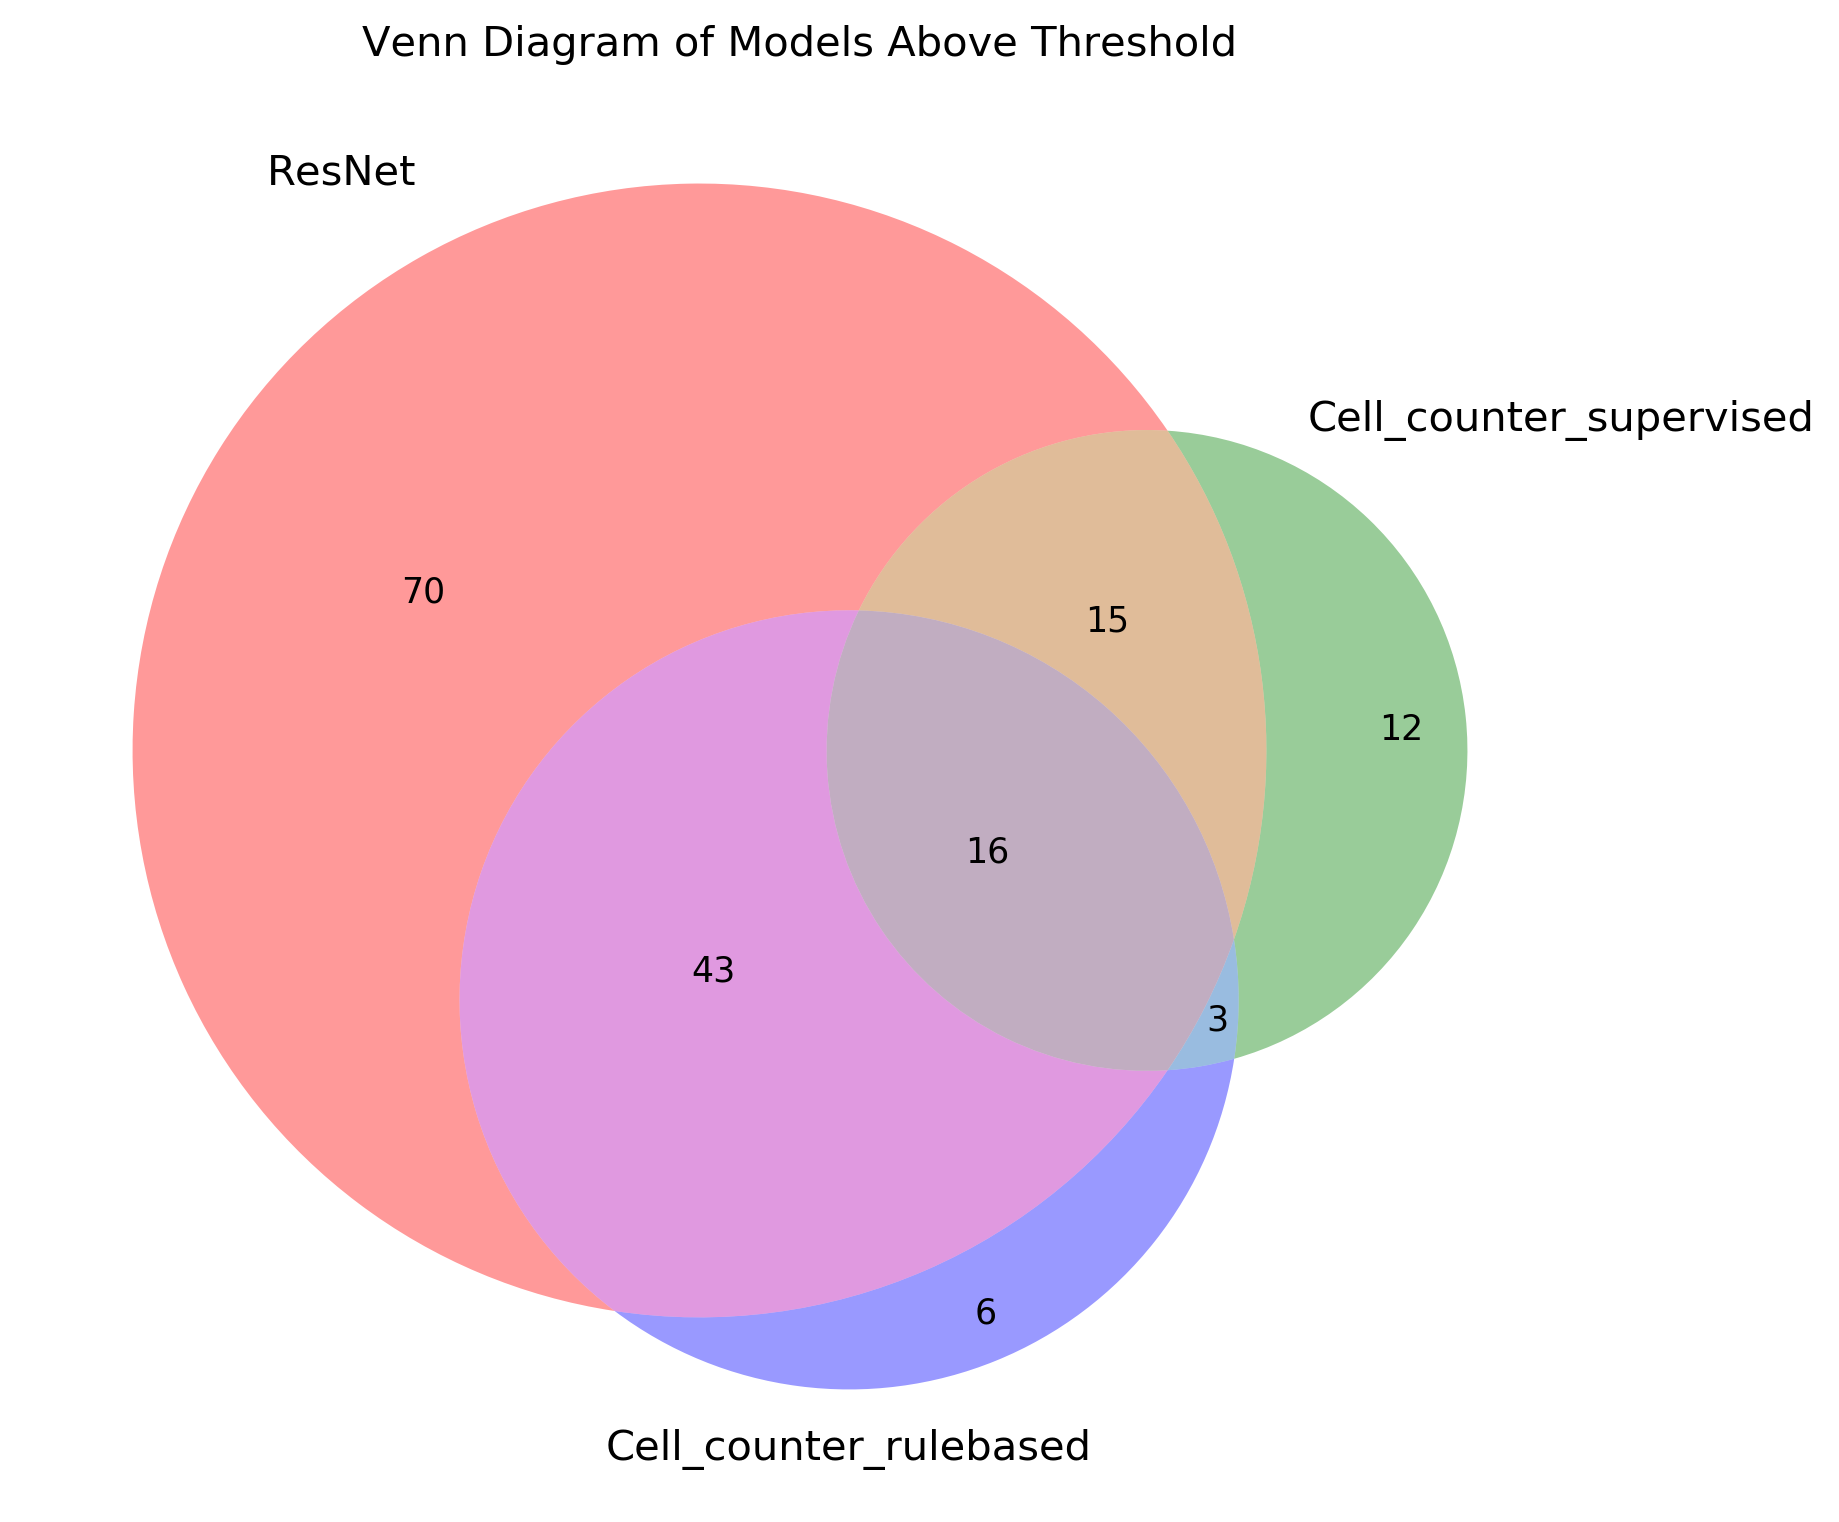

In [45]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


df =comparison_df
# Define threshold
threshold = 0.6

# Get sets of indices for each model where the values are above the threshold
ResNet_set = set(df.index[df['ResNet'] > threshold])
count_supervised = set(df.index[df['Cel_counter_model'] > threshold])
rule_based = set(df.index[df['Cell_counter_rulebased'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(8, 8), dpi=250)
venn3([ResNet_set, count_supervised, rule_based], ('ResNet', 'Cell_counter_supervised', 'Cell_counter_rulebased'))
plt.title('Venn Diagram of Models Above Threshold')
plt.show()


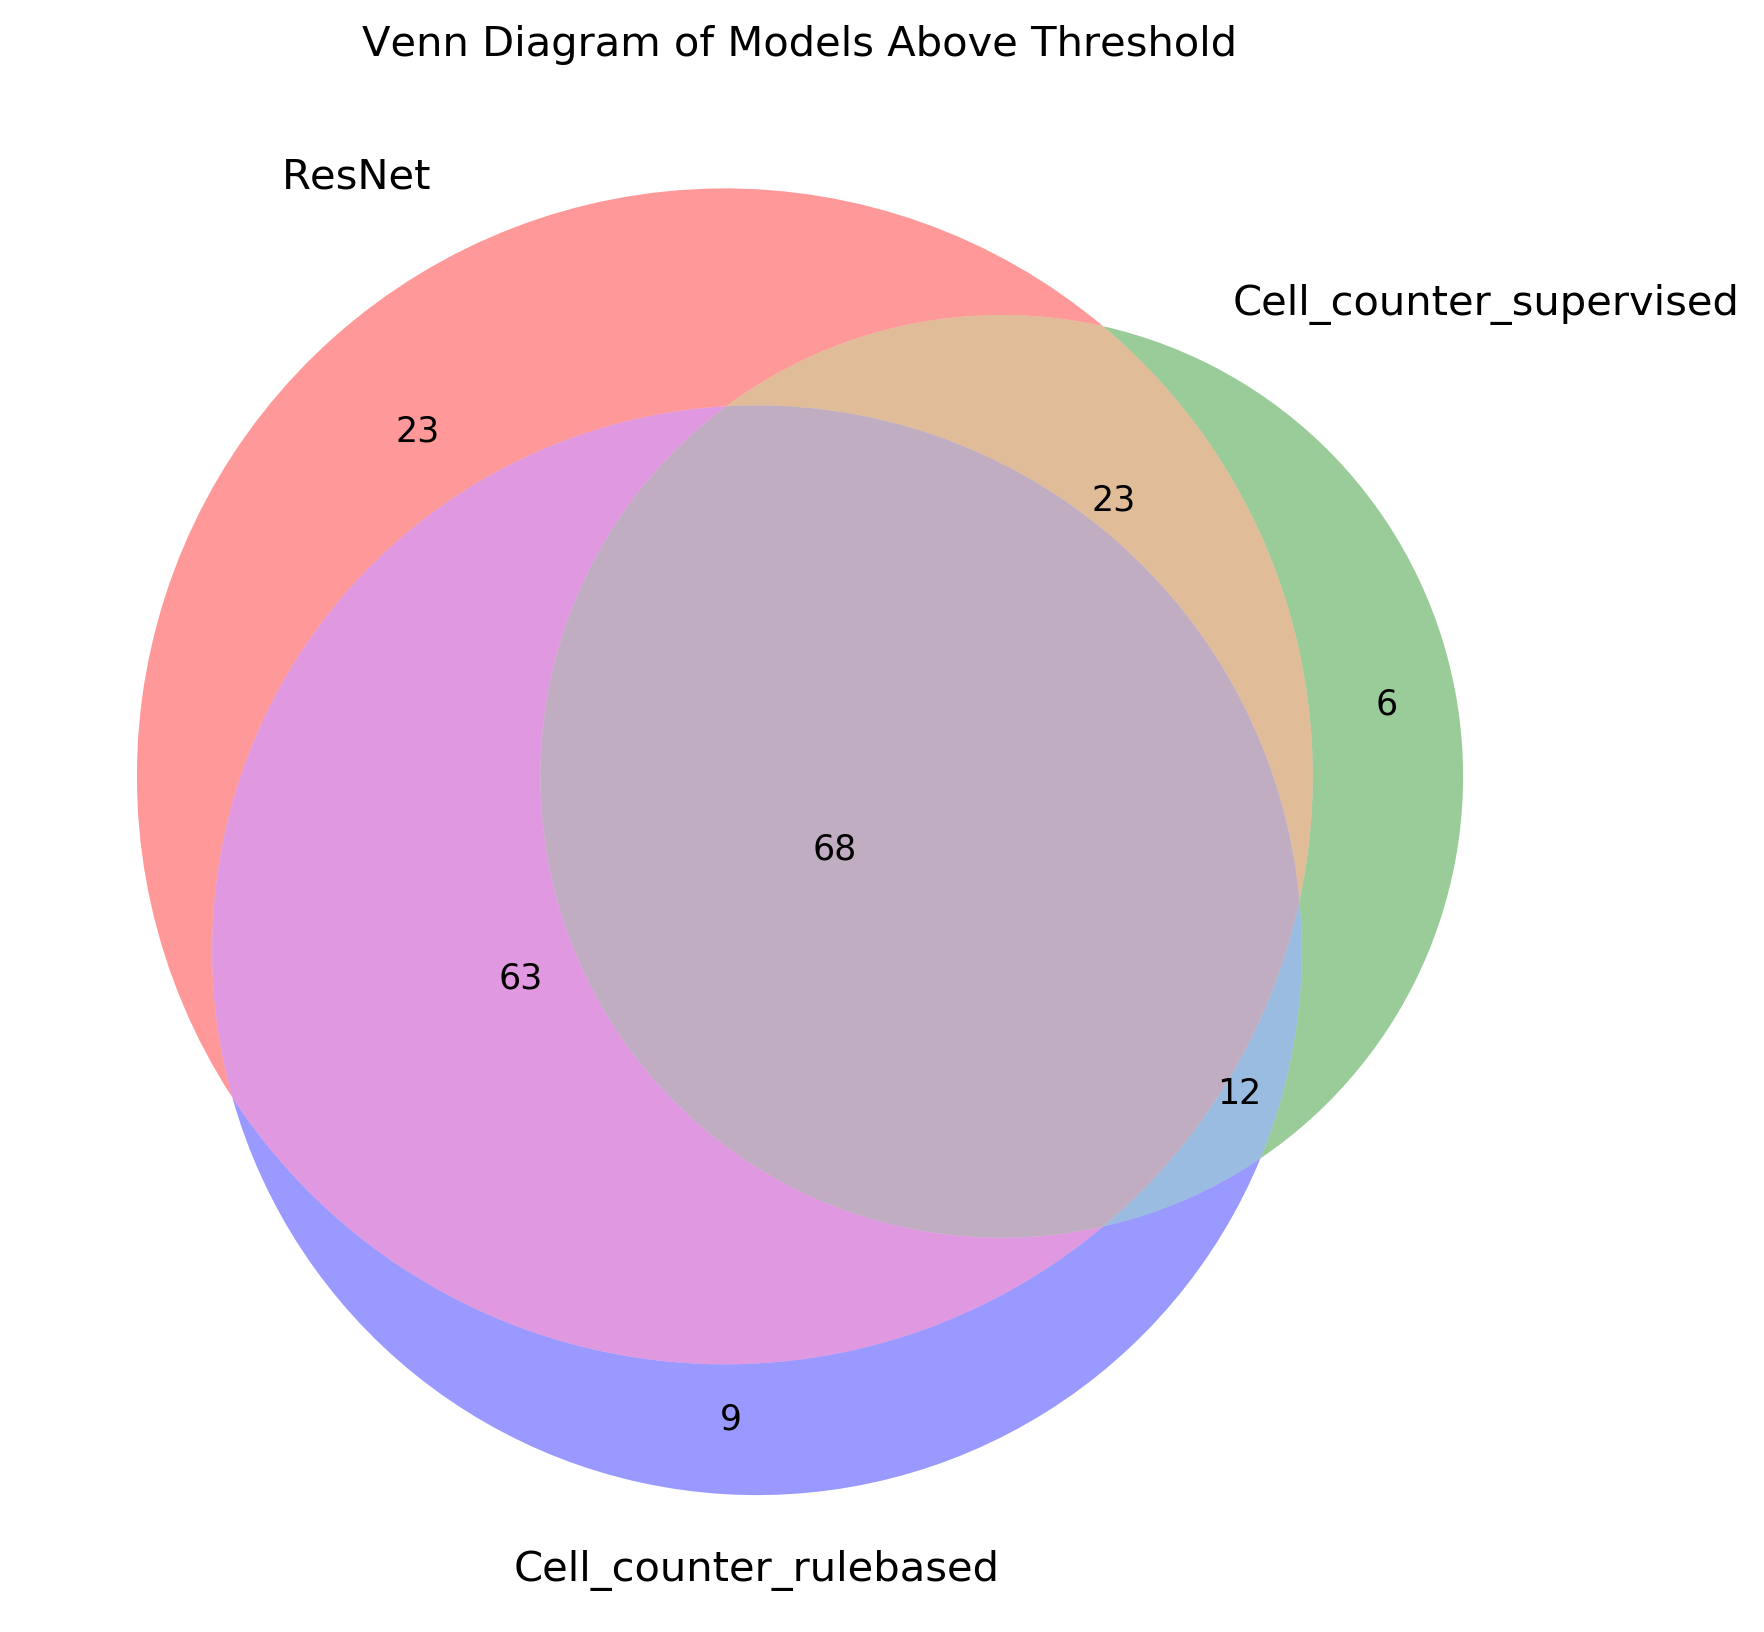

In [44]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


df =comparison_df
# Define threshold
threshold = 0.5

# Get sets of indices for each model where the values are above the threshold
ResNet_set = set(df.index[df['ResNet'] > threshold])
count_supervised = set(df.index[df['Cel_counter_model'] > threshold])
rule_based = set(df.index[df['Cell_counter_rulebased'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(8, 8), dpi=250)
venn3([ResNet_set, count_supervised, rule_based], ('ResNet', 'Cell_counter_supervised', 'Cell_counter_rulebased'))
plt.title('Venn Diagram of Models Above Threshold')
plt.show()


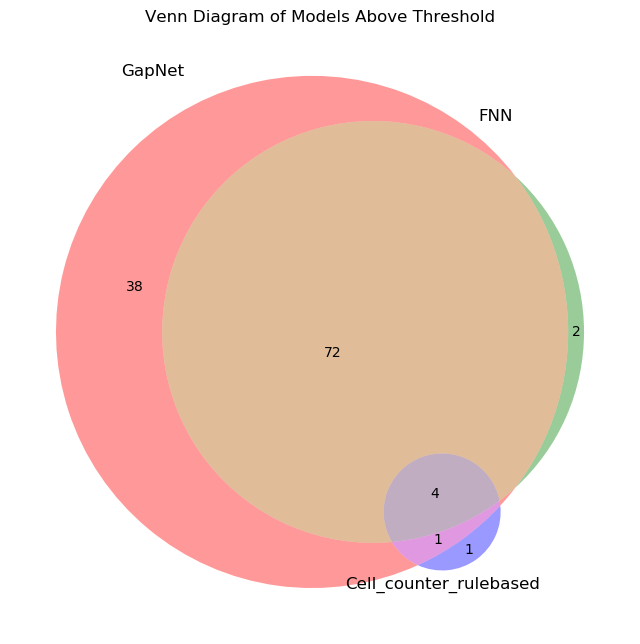

In [13]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


df =comparison_df
# Define threshold
threshold = 0.7

# Get sets of indices for each model where the values are above the threshold
densenet_set = set(df.index[df['GapNet'] > threshold])
fnn_set = set(df.index[df['FNN'] > threshold])
cellcounter_set = set(df.index[df['Cell_counter_rulebased'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn3([densenet_set, fnn_set, cellcounter_set], ('GapNet', 'FNN', 'Cell_counter_rulebased'))
plt.title('Venn Diagram of Models Above Threshold')
plt.show()


/home/jupyter-seal@broadinstitut-41f01/.local/lib/python3.7/site-packages/matplotlib_venn/_venn3.py:61: UserWarning: Circle C has zero area
  warnings.warn("Circle C has zero area")


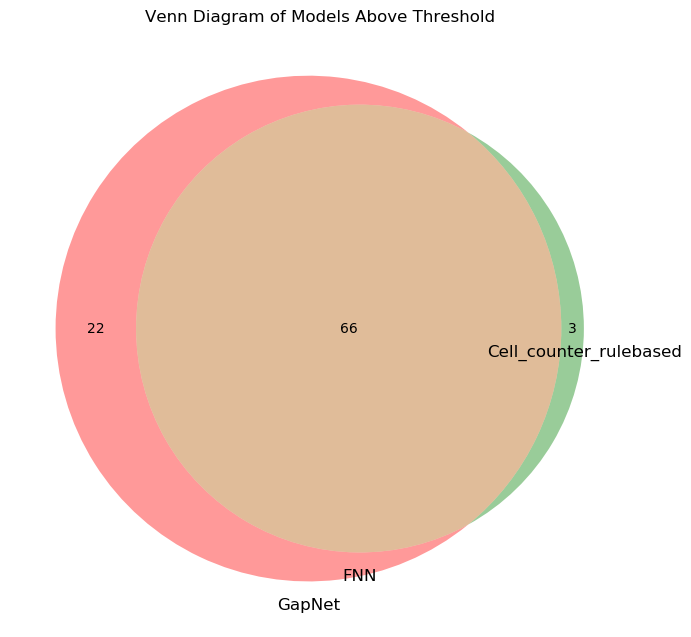

In [14]:
import matplotlib.pyplot as plt
from matplotlib_venn import venn3


df =comparison_df
# Define threshold
threshold = 0.8

# Get sets of indices for each model where the values are above the threshold
densenet_set = set(df.index[df['GapNet'] > threshold])
fnn_set = set(df.index[df['FNN'] > threshold])
cellcounter_set = set(df.index[df['Cell_counter_rulebased'] > threshold])

# Create the Venn diagram
plt.figure(figsize=(8, 8))
venn3([densenet_set, fnn_set, cellcounter_set], ('GapNet', 'FNN', 'Cell_counter_rulebased'))
plt.title('Venn Diagram of Models Above Threshold')
plt.show()


In [15]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, balanced_accuracy_score, recall_score, precision_score, roc_auc_score

# Load the dataset
file_path = '../The_Hofmarcher_Files/CP_count_Hofmarcher.csv'  # Update this with the actual file path
data = pd.read_csv(file_path)

# List of assay columns to process (assuming all columns except INCHIKEY and the last 13 columns are assays)
assay_columns = data.columns[1:-13]

In [16]:
data

,INCHIKEY,1,2,3,4,5,6,7,8,9,...,Cells_Neighbors_SecondClosestObjectNumber_5,Cells_Neighbors_SecondClosestObjectNumber_Adjacent,Cells_Parent_Nuclei,Cytoplasm_Number_Object_Number,Cytoplasm_Parent_Cells,Cytoplasm_Parent_Nuclei,Nuclei_Neighbors_FirstClosestObjectNumber_1,Nuclei_Neighbors_SecondClosestObjectNumber_1,Nuclei_Number_Object_Number,InChIKey
0,AACRWZVDRSTLKY-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.054688,-0.054688,0.859375,0.859375,0.859375,0.859375,1.445312,1.007812,0.859375,AACRWZVDRSTLKY-UHFFFAOYSA-N
1,AACUKVXTFOXDGE-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.171875,-1.171875,-1.148438,-1.148438,-1.148438,-1.148438,-1.101562,-1.453125,-1.148438,AACUKVXTFOXDGE-UHFFFAOYSA-N
2,AADCDMQTJNYOSS-LBPRGKRZSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.425781,-0.425781,0.453125,0.453125,0.453125,0.453125,-0.117188,-0.531250,0.453125,AADCDMQTJNYOSS-LBPRGKRZSA-N
3,AADORYZVGJDNSZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,1.123188,1.123188,0.521739,0.521739,0.521739,0.521739,1.536232,0.601449,0.521739,AADORYZVGJDNSZ-UHFFFAOYSA-N
4,AAEVYOVXGOFMJO-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-6.882812,-6.882812,-7.218750,-7.218750,-7.218750,-7.218750,-7.679688,-7.773438,-7.218750,AAEVYOVXGOFMJO-UHFFFAOYSA-N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10567,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.609375,0.609375,0.679688,0.679688,0.679688,0.679688,0.757812,0.757812,0.679688,ZZUCJGSOKDNIEZ-UHFFFAOYSA-N
10568,ZZUFCTLCJUWOSV-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-10.242188,-10.242188,-10.746094,-10.746094,-10.746094,-10.746094,-11.167969,-10.281250,-10.746094,ZZUFCTLCJUWOSV-UHFFFAOYSA-N
10569,ZZUZYEMRHCMVTB-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-16.171875,-16.171875,-16.304688,-16.304688,-16.304688,-16.304688,-16.335938,-15.152344,-16.304688,ZZUZYEMRHCMVTB-UHFFFAOYSA-N
10570,ZZVUWRFHKOJYTH-UHFFFAOYSA-N,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-0.640625,-0.640625,-1.664062,-1.664062,-1.664062,-1.664062,-1.257812,-0.289062,-1.664062,ZZVUWRFHKOJYTH-UHFFFAOYSA-N


In [17]:
len(assay_columns)

209

In [18]:
# Initialize a list to store results
sparsity_results = []

# Process each assay column
for assay in assay_columns:
    total_entries = len(data)
    valid_entries = data[assay].notna() & (data[assay] != -1)
    num_valid_entries = valid_entries.sum()
    num_missing_or_invalid = total_entries - num_valid_entries
    sparsity = num_missing_or_invalid / total_entries
    
    num_ones = (data.loc[valid_entries, assay] == 1).sum()
    num_zeros = (data.loc[valid_entries, assay] == 0).sum()
    
    # Append the result
    sparsity_results.append({
        'Assay': assay,
        'Total Entries': total_entries,
        'Valid Entries': num_valid_entries,
        'Missing or Invalid Entries': num_missing_or_invalid,
        'Sparsity': sparsity,
        'Num Ones': num_ones,
        'Num Zeros': num_zeros
    })

# Convert results to DataFrame
sparsity_df = pd.DataFrame(sparsity_results)

# Display the results DataFrame
sparsity_df


,Assay,Total Entries,Valid Entries,Missing or Invalid Entries,Sparsity,Num Ones,Num Zeros
0,1,10572,122,10450,0.988460,106,16
1,2,10572,102,10470,0.990352,30,72
2,3,10572,112,10460,0.989406,10,102
3,4,10572,78,10494,0.992622,23,55
4,5,10572,60,10512,0.994325,36,24
...,...,...,...,...,...,...,...
204,205,10572,305,10267,0.971150,214,91
205,206,10572,67,10505,0.993663,16,51
206,207,10572,36,10536,0.996595,16,20
207,208,10572,78,10494,0.992622,62,16


In [19]:
# Initialize counters
total_entries = 0
total_valid_entries = 0
total_ones = 0
total_zeros = 0
total_missing_or_invalid = 0

# Process each assay column
for assay in assay_columns:
    total_entries += len(data)
    valid_entries = data[assay].notna() & (data[assay] != -1)
    num_valid_entries = valid_entries.sum()
    total_valid_entries += num_valid_entries
    total_missing_or_invalid += len(data) - num_valid_entries
    
    total_ones += (data.loc[valid_entries, assay] == 1).sum()
    total_zeros += (data.loc[valid_entries, assay] == 0).sum()

# Calculate overall sparsity
overall_sparsity = total_missing_or_invalid / total_entries

# Store the results in a dictionary
overall_results = {
    'Total Entries': total_entries,
    'Valid Entries': total_valid_entries,
    'Missing or Invalid Entries': total_missing_or_invalid,
    'Sparsity': overall_sparsity,
    'Num Ones': total_ones,
    'Num Zeros': total_zeros
}

# Convert results to DataFrame for better display
overall_results_df = pd.DataFrame([overall_results])

# Display the results DataFrame
overall_results_df


,Total Entries,Valid Entries,Missing or Invalid Entries,Sparsity,Num Ones,Num Zeros
0,2209548,55526,2154022,0.97487,19268,36258


In [21]:
(19268/(19268+36258))

0.34700860857976445